# The convergence experiments for our FDI2CDI
- Our solution is : $V_{CDI}^{(k+1)}(x) = V_{FDI}(x-\frac{1}{2}V_{CDI}^{(k)}(x))$, with $V_{CDI}^{(0)}(x) = 0$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from flow import uniform, solid_rot, lamb_oseen, sin_flow # test flow vector fields
from fdi2cdi import fdi2cdi # our implementation of FDI2CDI method                           

np.random.seed(2024) 

In [2]:
# Generate all test vector field
x = np.arange(0,256,1)
y = np.arange(0,256,1)
x, y = np.meshgrid(x,y)

# synthetic flow field (Truth, FDI, CDI)
V1 = uniform(x,y)
V2 = solid_rot(x,y)
V3 = lamb_oseen(x,y)
V4 = sin_flow(x,y)

u_noise = 0.1*np.random.randn(*x.shape)
v_noise = 0.1*np.random.randn(*x.shape)

# noise version of the velocity field
V5 = (V1[0],(V1[1][0]+u_noise,V1[1][1]+v_noise),V1[2])
V6 = (V2[0],(V2[1][0]+u_noise,V2[1][1]+v_noise),V2[2])
V7 = (V3[0],(V3[1][0]+u_noise,V3[1][1]+v_noise),V3[2])
V8 = (V4[0],(V4[1][0]+u_noise,V4[1][1]+v_noise),V4[2])

rmse = np.sqrt(np.mean(np.square(u_noise)+np.square(v_noise)))
print(rmse)

0.14185448833441958


In [3]:
# Plot function of the results
def plot_show(results, iters, methods):
    # linestyles = ['-', '--', '-.', ':', '--', '-.', ':']
    linestyles = ['-', '--', (0, (3, 1, 1, 1)), ':', (0, (3, 1, 1, 1, 1, 1)), '-.', ':']

    plt.figure(figsize=(4.5,2.5))
    for k, method in enumerate(methods):
        plt.plot(iters,results[k,:],linestyle=linestyles[k], label=method)
    plt.legend(loc=1)
    plt.xlabel("Iteration number")
    plt.ylabel("RMSE(pixel)")
    plt.semilogy()
    plt.xlim(-0.5,10.5)
    plt.grid("on")
    plt.tight_layout()


# Test with an interpolation scheme
def test_one(V, method="BSPL3", iter=0):
    u_tru, v_tru = V[0]
    u_fdi, v_fdi = V[1]
    u_cdi, v_cdi = V[2]
    u_fdi2cdi, v_fdi2cdi = fdi2cdi(u_fdi, v_fdi, t=0, delta=1, method=method, iter=iter)

    error =  np.sqrt(np.square(u_fdi2cdi-u_cdi)+ np.square(v_fdi2cdi-v_cdi))+1e-15
    rmse = np.sqrt(np.mean(np.square(error[25:-25,25:-25])))
    # print(rmse)
    return rmse

# Test with all interpolation schemes for a given vector field
def test_all(V):
    methods = ["BSPL3", "BSPL4", "BSPL5", "Bilinear", "Bicubic", "SINC8"]
    iters = np.array(np.arange(11))
    results = np.zeros((len(methods), len(iters)))

    for i,method in enumerate(methods):
        for j,iter in enumerate(iters):
            rmse = test_one(V, method=method, iter=iter)
            results[i,j] = rmse

    plot_show(results, iters, methods)

test_one(V2)

5.047403728128049

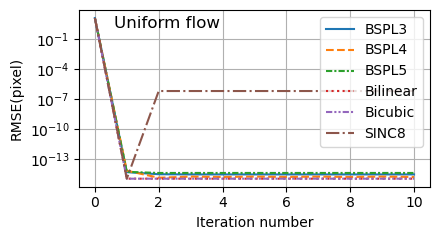

In [4]:
# The results with Vector field V1
test_all(V1)
plt.title("Uniform flow",x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_ax.pdf")
plt.show()

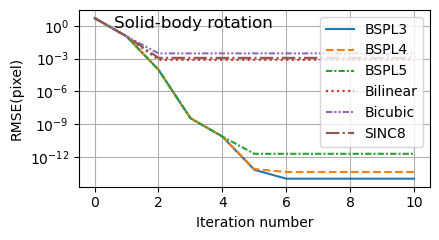

In [5]:
# The results with Vector field V2
test_all(V2)
plt.title("Solid-body rotation",x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_bx.pdf")
plt.show()

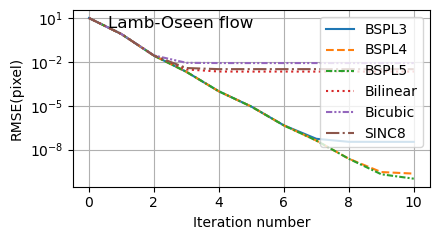

In [6]:
# The results with Vector field V3
test_all(V3)
plt.title("Lamb-Oseen flow",x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_cx.pdf")
plt.show()

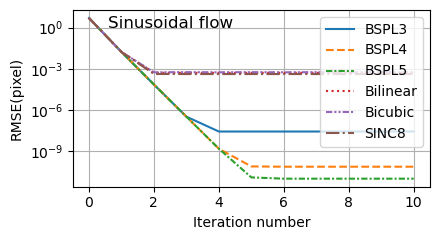

In [7]:
# The results with Vector field V4
test_all(V4)
plt.title("Sinusoidal flow",x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_dx.pdf")
plt.show()

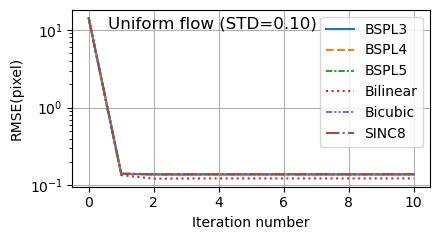

In [8]:
# The results with Vector field V5
test_all(V5)
plt.title("Uniform flow (STD=0.10)", x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_ex.pdf")
plt.show()

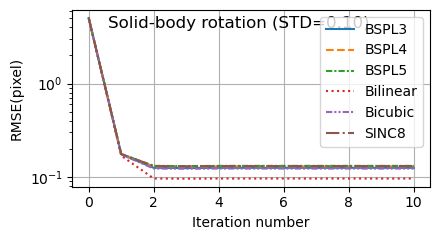

In [9]:
# The results with Vector field V6
test_all(V6)
plt.title("Solid-body rotation (STD=0.10)", x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_fx.pdf")
plt.show()

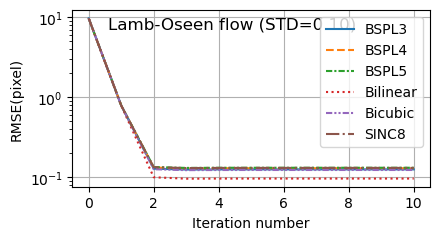

In [10]:
# The results with Vector field V7
test_all(V7)
plt.title("Lamb-Oseen flow (STD=0.10)", x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_gx.pdf")
plt.show()

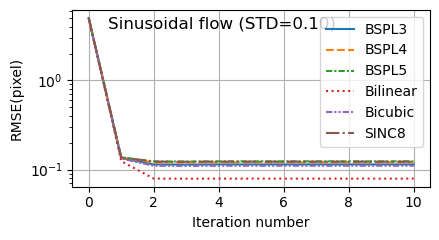

In [11]:
# The results with Vector field V8
test_all(V8)
plt.title("Sinusoidal flow (STD=0.10)", x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig6_hx.pdf")
plt.show()